# Nueva aplicación para amantes de libros

<a id=indice></a>
# Tabla de Contenido

[1 Descripción del Proyecto](#descripcion)

[2 Lectura y preparación de datos](#preparacion_data)

[3 Análisis exploratorio de datos](#analisis_data)

[4 Conclusiones](#conclusiones)

<a id='descripcion'></a>
## Descripción del Proyecto

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

[Volver a la Tabla de Contenido](#indice)

<a id = 'preparacion_data'></a>
## Lectura y preparación de los datos

### Descripción de los datos

**`books`**
Contiene datos sobre libros.
- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

**`authors`**
Contiene datos sobre autores.
- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

**`publishers`**
Contiene datos sobre editoriales.
- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

**`ratings`**
Contiene datos sobre las calificaciones de usuarios.
- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

**`reviews`**
Contiene datos sobre las reseñas de los y las clientes.
- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña

### Diagrama de datos

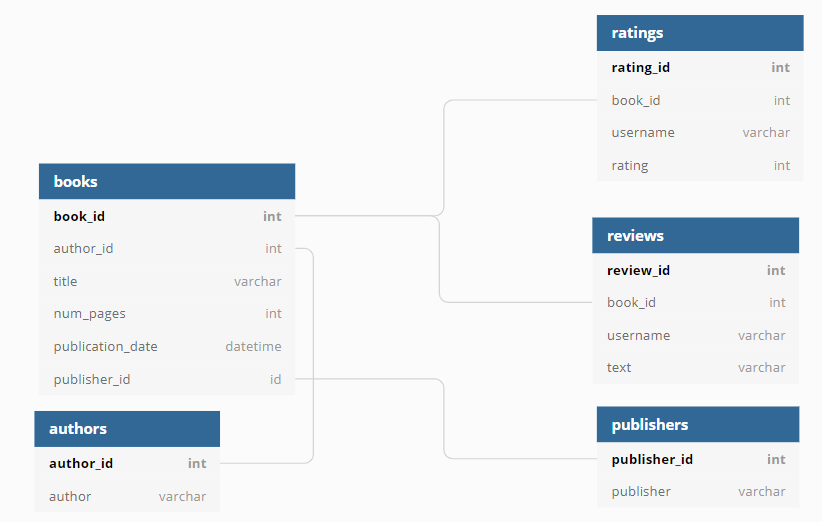

### Conexión a la base de datos

In [1]:
# Importamos librerías a usar

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
# Establecemos conexión a la base de datos brindada para el desarrollo del proyecto

db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Definición de función para ejecutar consultas en la base de datos

In [3]:
# Creamos una función que permitirá la ejecución de las consultas a la base de datos brindada
def consulta_bd(query):    
    resultado = pd.io.sql.read_sql(query, con = engine)
    return resultado    

### Tablas de la base de datos

#### Tabla `books`

In [4]:
# Previsualización de la tabla
query = 'select * from books LIMIT 5;'
consulta_bd(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


#### Tabla `authors`

In [5]:
# Previsualización de la tabla
query = 'select * from authors LIMIT 5;'
consulta_bd(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


#### Tabla `ratings`

In [6]:
# Previsualización de la tabla
query = 'select * from ratings LIMIT 5;'
consulta_bd(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


#### Tabla `reviews`

In [7]:
# Previsualización de la tabla
query = 'select * from reviews LIMIT 5;'
consulta_bd(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


#### Tabla `publishers`

In [8]:
# Previsualización de la tabla
query = 'select * from publishers LIMIT 5;'
consulta_bd(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


[Volver a la Tabla de Contenido](#indice)

<a id='analisis_data'></a>
## Análisis exploratorio de datos

### Encuentra el número de libros publicados después del 1 de enero de 2000

In [9]:
query = ''' select
                count(b.book_id) as books_number_published
            from books as b
            where cast(b.publication_date as date)>cast('2000-01-01' as date);'''

consulta_bd(query)

,books_number_published
0,819


In [10]:
query = ''' select
                b.publication_date,
                count(b.book_id) as books_number_published
            from books as b
            where cast(b.publication_date as date)>cast('2000-01-01' as date)
            group by b.publication_date
            order by count(b.book_id) desc;'''

df = consulta_bd(query)
df.head(5)

,publication_date,books_number_published
0,2004-06-01,10
1,2006-08-29,10
2,2006-09-26,9
3,2006-04-25,8
4,2004-08-31,8


<AxesSubplot:xlabel='publication_date', ylabel='books_number_published'>

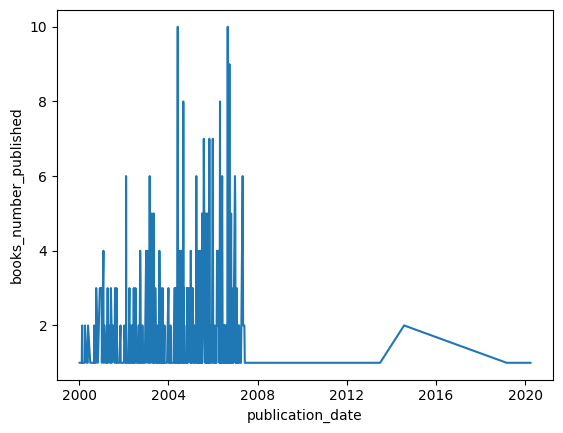

In [11]:
sns.lineplot(x = "publication_date", y = "books_number_published", data = df, )

Posterior al 1 de enero del 2000 hasta el 2020 se han publicado 819 libros. Además, se observa que en el período de los años 2000 y 2008 es donde se dió el pico de publicaciones de libros.

### Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro

In [12]:
# Encontramos al libro con mayor cantidad de reviews.
query = ''' select distinct
                b.title as books_title,
                count(rw.review_id) as reviews_number,
                round(avg(rt.rating), 2) as ratings_avg
            from books as b
            left join reviews as rw on rw.book_id = b.book_id
            left join ratings as rt on rt.book_id = b.book_id
            group by b.title
            order by  count(rw.review_id) desc;
        '''
df = consulta_bd(query)
df.head(5)

,books_title,reviews_number,ratings_avg
0,Twilight (Twilight #1),1120,3.66
1,The Hobbit or There and Back Again,528,4.13
2,The Catcher in the Rye,516,3.83
3,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.41
4,Harry Potter and the Chamber of Secrets (Harry...,480,4.29


In [13]:
# Encontramos al libro con mayor rating promedio.
query = ''' select distinct
                b.title as books_title,
                count(rw.review_id) as reviews_number,
                round(avg(rt.rating), 2) as ratings_avg
            from books as b
            left join reviews as rw on rw.book_id = b.book_id
            left join ratings as rt on rt.book_id = b.book_id
            group by b.title
            order by round(avg(rt.rating), 2) desc;
        '''
df = consulta_bd(query)
df.head(5)

,books_title,reviews_number,ratings_avg
0,A Dirty Job (Grim Reaper #1),16,5.0
1,A Fistful of Charms (The Hollows #4),4,5.0
2,A Woman of Substance (Emma Harte Saga #1),4,5.0
3,Act of Treason (Mitch Rapp #9),4,5.0
4,Alas Babylon,4,5.0


In [14]:
df.describe()

,reviews_number,ratings_avg
count,999.000000,999.000000
mean,26.193193,3.899179
std,68.441656,0.562606
min,0.000000,1.500000
25%,4.000000,3.500000
50%,9.000000,4.000000
75%,18.000000,4.330000
max,1120.000000,5.000000


* Se observa que el libro con mayor cantidad de reviews fue "Twilight (Twilight #1)" con 1,120 reviews y con un rating promedio de 3.66.
* Mientras que el libro con mayor rating fue "A Dirty Job (Grim Reaper #1)" con un score promedio de 5; sin embargo, solo recibió 16 reviews.

### Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas
Esto te ayudará a excluir folletos y publicaciones similares de tu análisis

In [15]:
query = ''' select distinct
                p.publisher,
                count(b.book_id) as books_number_published
            from books as b
            inner join publishers as p on p.publisher_id = b.publisher_id
            where b.num_pages > 50
            group by p.publisher
            order by count(b.book_id) desc limit 25;
            '''
consulta_bd(query)

,publisher,books_number_published
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


La editorial que publicó mayor cantidad de libros fue "Penguin Books" con un total de 42 libros. Seguido de "Vintage" con 31 libros y "Grand Central Publishing" con 25 libros.

### Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones

In [16]:
query = '''
        select distinct
            a.author,
            b.title as books_title,
            round(avg(rt.rating), 2) as ratings_avg
        from books as b
        left join ratings as rt on rt.book_id = b.book_id
        inner join authors as a on a.author_id = b.author_id
        inner join (select 
                        b.book_id,
                        count(rt.rating_id) as ratings_number
                    from books as b
                    left join ratings as rt on rt.book_id=b.book_id
                    group by b.book_id
                    having count(rt.rating_id)>=50) as bb on bb.book_id=b.book_id
        group by a.author, b.title
        order by round(avg(rt.rating), 2) desc                       
        '''
consulta_bd(query)

,author,books_title,ratings_avg
0,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...,4.41
1,J.R.R. Tolkien,The Fellowship of the Ring (The Lord of the Ri...,4.39
2,J.K. Rowling/Mary GrandPré,Harry Potter and the Chamber of Secrets (Harry...,4.29
3,Markus Zusak/Cao Xuân Việt Khương,The Book Thief,4.26
4,J.K. Rowling/Mary GrandPré,Harry Potter and the Half-Blood Prince (Harry ...,4.25
5,J.K. Rowling/Mary GrandPré,Harry Potter and the Order of the Phoenix (Har...,4.19
6,Louisa May Alcott,Little Women,4.19
7,J.R.R. Tolkien,The Hobbit or There and Back Again,4.13
8,Rick Riordan,The Lightning Thief (Percy Jackson and the Oly...,4.08
9,William Golding,Lord of the Flies,3.90


Solo el 1.9% de los libros de la base de datos tuvieron al menos 50 calificaciones, dentro de los cuales el autor con mayor calificación de rating promedio fue "J.K. Rowling/Mary GrandPré" con un score promedio de 4.41 con el libro "Harry Potter and the Prisoner of Azkaban".

### Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros

In [17]:
query = '''select
                avg(r.reviews_number) as avg_reviews_number
            from (select
                        rt.username,
                        count(rt.book_id) as books_rating_number,
                        count(rv.review_id) as reviews_number
                    from ratings as rt
                    left join reviews as rv on rv.book_id = rt.book_id and rv.username = rt.username
                    group by rt.username
                    having count(rt.book_id)>50
                    order by count(rt.book_id) desc) as r
        '''
consulta_bd(query)

,avg_reviews_number
0,24.333333


Solo 6 usuarios calificaron más de 50 libros para los cuales el número promedio de reseñas de texto que realizaron fue de 24 comentarios.

[Volver a la Tabla de Contenido](#indice)

<a id='conclusiones'></a>
## Conclusiones

Luego de explorar la información de la información compartida se observa lo siguiente:
* Posterior al 1 de enero del 2000 hasta el 2020 se han publicado 819 libros. Además, se observa que en el período de los años 2000 y 2008 es donde se dió el pico de publicaciones de libros.
* Se observa que el libro con mayor cantidad de reviews fue "Twilight (Twilight #1)" con 1,120 reviews y con un rating promedio de 3.66. Mientras que el libro con mayor rating fue "A Dirty Job (Grim Reaper #1)" con un score promedio de 5; sin embargo, solo recibió 16 reviews.
* La editorial que publicó mayor cantidad de libros fue "Penguin Books" con un total de 42 libros. Seguido de "Vintage" con 31 libros y "Grand Central Publishing" con 25 libros.
* Solo el 1.9% de los libros de la base de datos tuvieron al menos 50 calificaciones, dentro de los cuales el autor con mayor calificación de rating promedio fue "J.K. Rowling/Mary GrandPré" con un score promedio de 4.41 con el libro "Harry Potter and the Prisoner of Azkaban".
* Solo 6 usuarios calificaron más de 50 libros para los cuales el número promedio de reseñas de texto que realizaron fue de 24 comentarios.

En base a lo explorado de la base de datos se concluye lo siguiente:
* Se sugiere que la startup tenga en su plataforma a los libros con mayor score promedio de rating (de 3.5 a más).
* La startup podría generar sinergías comerciales con las editoriales con mayor número de libros para que usen la plataforma como un canal más de venta (22 editoriales con las que negociar si consideramos a aquellas que al menos publicaron 10 libros.). 
* La startup podría considerar contactar a los autores con mayor score promedio de rating (de 3.5 a más) para ofrecerles que publiquen sus libros a través de la aplicación a lanzar, lo cual sería beneficioso para ambas partes. Podrían empezar por los autores de los 19 libros que tuvieron mayor calificación de rating.
* Además, se sugiere tener en cuenta a los usuarios (6 personas) que calificaron más de 50 libros, podrían brindarles el acceso a la aplicación de manera gratuita con la condición que realicen reviews en el nuevo producto a lanzar, esto permitiría que más personas tengan incentivo a leer los libros.

[Volver a la Tabla de Contenido](#indice)